In [5]:
import pandas as pd
df=pd.read_csv("loans_join.csv")

df.head(5)


,Loan_ID,LoanAmount,Loan_Amount_Term,Loan_Status,ApplicationDate,custID,Loan_ID.1,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area
0,LP001347,108,360,N,31-12-2016,64,LP001347,Female,No,0,Graduate,No,2101,1500,0,Rural
1,LP002009,65,360,Y,01-04-2018,178,LP002009,Female,No,0,Graduate,No,2918,0,0,Rural
2,LP002858,162,360,N,27-06-2018,340,LP002858,Female,No,0,Graduate,No,4333,2333,0,Rural
3,LP002321,117,360,N,21-10-2018,237,LP002321,Female,No,0,Graduate,No,2274,5211,0,Semiurban
4,LP002496,94,360,N,07-11-2016,275,LP002496,Female,No,0,Graduate,No,3500,0,0,Semiurban


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            367 non-null    object
 1   LoanAmount         367 non-null    int64 
 2   Loan_Amount_Term   367 non-null    int64 
 3   Loan_Status        367 non-null    object
 4   ApplicationDate    367 non-null    object
 5   custID             367 non-null    int64 
 6   Loan_ID.1          367 non-null    object
 7   Gender             367 non-null    object
 8   Married            367 non-null    object
 9   Dependents         367 non-null    int64 
 10  Education          367 non-null    object
 11  Self_Employed      367 non-null    object
 12  ApplicantIncome    367 non-null    int64 
 13  CoapplicantIncome  367 non-null    int64 
 14  Credit_History     367 non-null    int64 
 15  Property_Area      367 non-null    object
dtypes: int64(7), object(9)
memory usage: 46.0+ K

In [7]:
df.describe()   

,LoanAmount,Loan_Amount_Term,custID,Dependents,ApplicantIncome,CoapplicantIncome,Credit_History
count,367.000000,367.00000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,137.002725,339.47139,184.000000,0.806540,4805.599455,1569.577657,0.760218
std,61.949102,69.80577,106.088014,1.065177,4910.685399,2334.232099,0.427533
min,28.000000,6.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,100.500000,360.00000,92.500000,0.000000,2864.000000,0.000000,1.000000
50%,125.000000,360.00000,184.000000,0.000000,3786.000000,1025.000000,1.000000
75%,158.500000,360.00000,275.500000,2.000000,5060.000000,2430.500000,1.000000
max,550.000000,480.00000,367.000000,3.000000,72529.000000,24000.000000,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. No of male and female applied for loan?

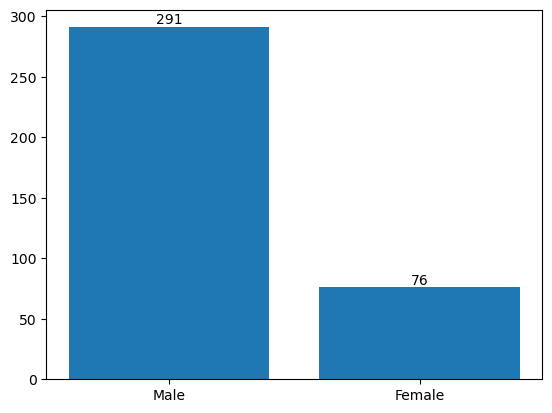

In [9]:
loans_age = df.groupby(['Gender'], as_index=False)['LoanAmount'].count().sort_values(by='LoanAmount', ascending=False)
plt.bar(loans_age.Gender,loans_age.LoanAmount)
for i,value in enumerate(loans_age.LoanAmount):
    plt.text(i,value + 0.1, str(value), ha='center', va='bottom')

# 2.No of married male applied for loan?

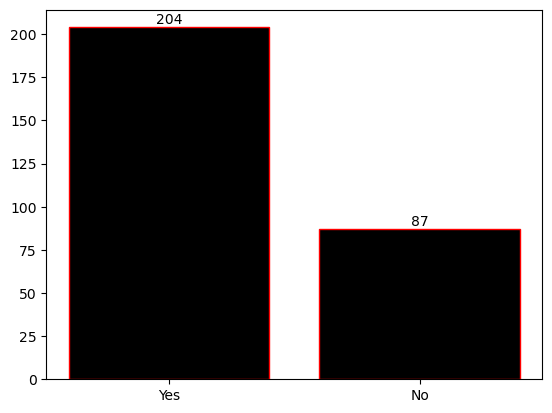

In [10]:
Married_Male=df[df['Gender']=='Male']['Married'].value_counts()
plt.bar(Married_Male.index,Married_Male.values,color='black',edgecolor='r')
for i,value in enumerate(Married_Male.values):
    plt.text(i,value+0.1,str(value),ha='center',va='bottom')

# 3.educational Background who applied for loan?


([<matplotlib.patches.Wedge at 0x1cc05ba0620>,
 [Text(-0.8276701475455569, 0.7245427018899, 'Graduate'),
  Text(0.8276701136272641, -0.7245427406359352, 'Not Graduate')],
 [Text(-0.45145644411575825, 0.39520511012176357, '77.1%'),
  Text(0.45145642561487126, -0.39520513125596457, '22.9%')])

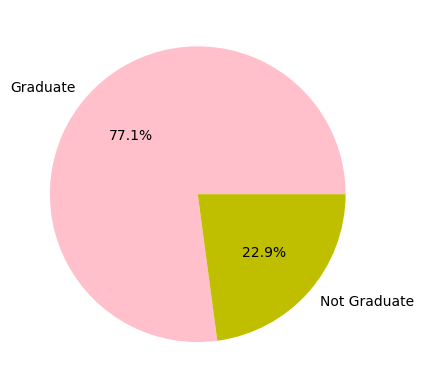

In [11]:
plt.pie(df.Education.value_counts(),labels=['Graduate','Not Graduate'],autopct='%1.1f%%',explode=(0,0),colors=('pink','y'))


# 4.credit history wise loan status ?


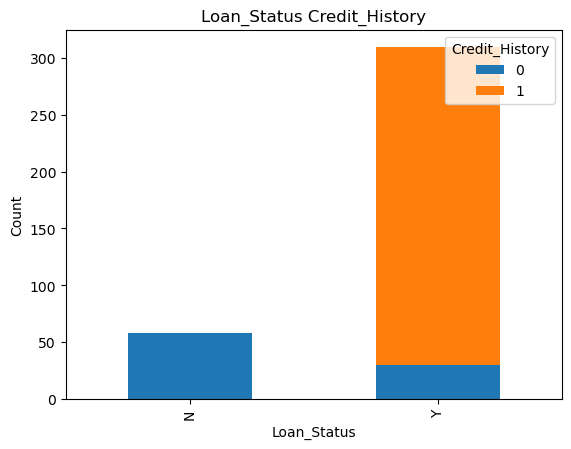

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has 'Sex' and 'Survived' columns
# Create a crosstab to get counts of survivors and non-survivors by gender
loan_credit_hist = pd.crosstab(df['Loan_Status'], df['Credit_History'])

# Plot the stacked bar chart
loan_credit_hist.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.title('Loan_Status Credit_History')
plt.legend (title='Credit_History', loc='upper right')
plt.show()

# 5.applied for loan by years  wise?

([<matplotlib.patches.Wedge at 0x1cc05d4c500>,
 [Text(0.8139086756143182, 0.7399680180654747, '2016'),
  Text(-1.1622646865602, 0.5823579641209693, '2017'),
  Text(0.259729509368153, -1.0688968995948012, '2018'),
  Text(1.0907056186974344, -0.14269286366825454, '2019')])

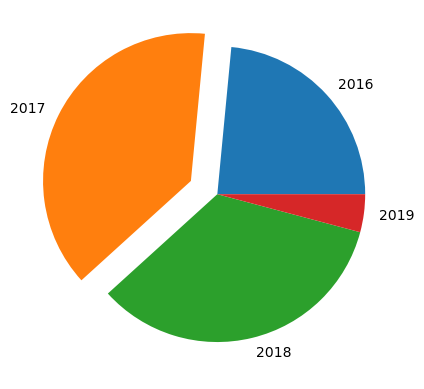

In [13]:
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], dayfirst=True)
# Extract the year and add it as a new column
df['Year'] = df['ApplicationDate'].dt.year

year_wise_sum=df.groupby(['Year'], as_index=False)['LoanAmount'].sum().sort_values(by='Year')
plt.pie(year_wise_sum.LoanAmount,labels=[2016,2017,2018,2019],explode=(0,.2,0,0))

6. high value applicant by income?

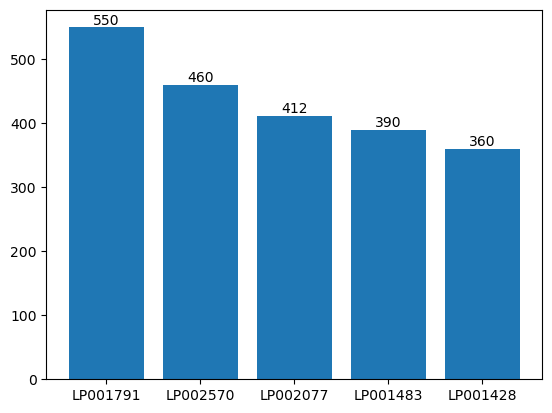

In [14]:
high_value_applicant=df.groupby(['Loan_ID'], as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount',ascending=False).head(5)
plt.bar(high_value_applicant.Loan_ID,high_value_applicant.LoanAmount)

# Add data points
for i, value in enumerate(high_value_applicant.LoanAmount):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# 7.region wise loan application?


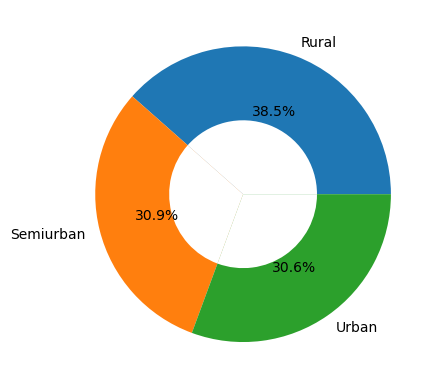

In [15]:
Property_Area_loanAmount=df.groupby(['Property_Area'], as_index=False)['LoanAmount'].sum().sort_values(by='LoanAmount',ascending=False)
pie1=plt.pie(Property_Area_loanAmount.LoanAmount,labels=['Rural', 'Semiurban', 'Urban'],autopct='%0.1f%%',radius=1)
pie2=plt.pie(Property_Area_loanAmount.LoanAmount,radius=.5,colors="w")


8.applied for loan Months wise?

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2224\3264909203.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = month_wise_sum, x = 'month',y= 'LoanAmount',palette="muted")


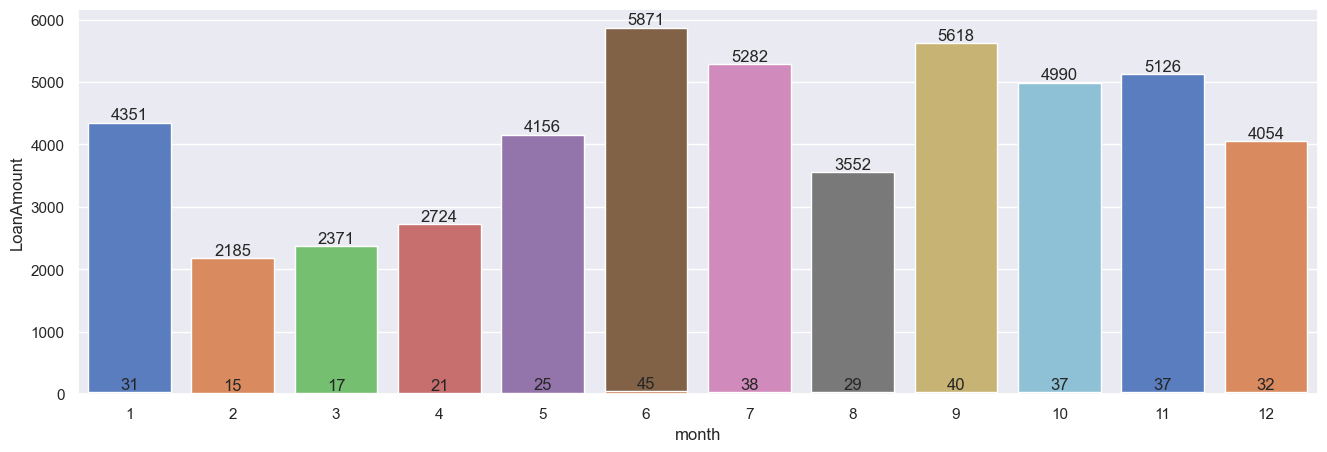

In [16]:
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], dayfirst=True)
#Extract the year and add it as a new column
df['month'] = df['ApplicationDate'].dt.month

month_wise_sum=df.groupby(['month'], as_index=False)['LoanAmount'].sum().sort_values(by='month')

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data = month_wise_sum, x = 'month',y= 'LoanAmount',palette="muted")

ax = sns.countplot(data = df, x = 'month')
for bars in ax.containers:
    ax.bar_label(bars)